In [1]:
import os
os.chdir('G:\\DataScience\\shiva time\\Microsoft Malware Prediction')

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

In [3]:
df=pd.read_csv('train_M1.csv')

In [4]:
df.columns

Index(['index', 'AppVersion', 'AVProductsEnabled', 'AVProductsInstalled',
       'AVProductStatesIdentifier', 'AvSigVersion', 'Census_ActivationChannel',
       'Census_ChassisTypeName', 'Census_DeviceFamily',
       'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier', 'Census_FlightRing',
       'Census_GenuineStateName', 'Census_HasOpticalDiskDrive',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Census_IsPenCapable',
       'Census_IsPortableOperatingSystem', 'Census_IsSecureBootEnabled',
       'Census_IsTouchEnabled', 'Census_IsVirtualDevice',
       'Census_MDC2FormFactor', 'Census_OEMModelIdentifier',
       'Census_OEMNameIdentifier', 'Census_OSArchitecture', 'Census_OSBranch',
       'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSEdition',
       'Census_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 72 columns):
index                                                300000 non-null int64
AppVersion                                           300000 non-null int64
AVProductsEnabled                                    300000 non-null float64
AVProductsInstalled                                  300000 non-null float64
AVProductStatesIdentifier                            300000 non-null float64
AvSigVersion                                         300000 non-null int64
Census_ActivationChannel                             300000 non-null int64
Census_ChassisTypeName                               300000 non-null int64
Census_DeviceFamily                                  300000 non-null int64
Census_FirmwareManufacturerIdentifier                300000 non-null float64
Census_FirmwareVersionIdentifier                     300000 non-null float64
Census_FlightRing                                    3

In [6]:
def convert_types(df):
    # Convert data types to reduce memory
    for c in df:
        col_type = str(df[c].dtypes)
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        
        # Convert objects to category
        if col_type == 'object':
            df[c] = df[c].astype('category')
        
        # numerics
        elif col_type in numerics:
            c_min = df[c].min()
            c_max = df[c].max()
            if col_type[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[c] = df[c].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[c] = df[c].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[c] = df[c].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[c] = df[c].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[c] = df[c].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[c] = df[c].astype(np.float32)
                else:
                    df[c] = df[c].astype(np.float64)  
        
    return df

In [7]:
df = convert_types(df)

In [8]:
df.head()

,index,AppVersion,AVProductsEnabled,AVProductsInstalled,AVProductStatesIdentifier,AvSigVersion,Census_ActivationChannel,Census_ChassisTypeName,Census_DeviceFamily,Census_FirmwareManufacturerIdentifier,...,Platform,Processor,RtpStateBitfield,SkuEdition,SmartScreen,SMode,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections,Census_MDC2FormFactor_new
0,0,0,1.0,1.0,53447.0,81,1,11,0,628.0,...,0,1,7.0,6,6,0.0,0.0,10.0,0.0,2
1,1,4,1.0,1.0,53447.0,1,1,21,0,628.0,...,0,1,7.0,6,6,0.0,0.0,8.0,0.0,4
2,2,0,1.0,1.0,53447.0,176,0,11,0,142.0,...,0,1,7.0,4,5,0.0,0.0,3.0,0.0,2
3,3,0,1.0,1.0,53447.0,16,0,19,0,355.0,...,0,1,7.0,6,1,0.0,0.0,3.0,1.0,2
4,4,0,1.0,1.0,53447.0,12,1,22,0,355.0,...,0,1,7.0,4,5,0.0,0.0,1.0,1.0,4


In [12]:
num_col=df.select_dtypes(include=[np.number]).columns

In [13]:
num_col

Index(['index', 'AppVersion', 'AVProductsEnabled', 'AVProductsInstalled',
       'AVProductStatesIdentifier', 'AvSigVersion', 'Census_ActivationChannel',
       'Census_ChassisTypeName', 'Census_DeviceFamily',
       'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier', 'Census_FlightRing',
       'Census_GenuineStateName', 'Census_HasOpticalDiskDrive',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Census_IsPenCapable',
       'Census_IsPortableOperatingSystem', 'Census_IsSecureBootEnabled',
       'Census_IsTouchEnabled', 'Census_IsVirtualDevice',
       'Census_MDC2FormFactor', 'Census_OEMModelIdentifier',
       'Census_OEMNameIdentifier', 'Census_OSArchitecture', 'Census_OSBranch',
       'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSEdition',
       'Census_

In [16]:
excel_table = pd.read_excel('Data_Description.xlsx')
excel_table = excel_table[excel_table['Relevant']==1]
relevant_features = [el.replace('\xa0','') for el in excel_table['Feature']]

In [17]:
target = 'HasDetections'
# id from data set
data_id = 'MachineIdentifier'

In [18]:
relevant_features.append(target)

In [19]:
numerical_features = excel_table[excel_table['FeatureType']=='Numeric']['Feature'].reset_index(drop=True)
categorical_features = excel_table[excel_table['FeatureType']=='Category']['Feature'].reset_index(drop=True)
binary_features = excel_table[excel_table['FeatureType']=='Boolean']['Feature'].reset_index(drop=True)

In [27]:
@interact
def lineplot(col=numerical_features):
    df[col].plot()
    plt.title(str(col))

interactive(children=(Dropdown(description='col', options=('Census_InternalPrimaryDiagonalDisplaySizeInInches'…

In [45]:
@interact
def lineplot(col=binary_features):
    df[col].plot()
    plt.title(str(col))

interactive(children=(Dropdown(description='col', options=('Census_HasOpticalDiskDrive', 'Census_IsAlwaysOnAlw…

In [46]:
@interact
def lineplot(col=numerical_features):
    sns.distplot(df[col])
    plt.title(str(col))

interactive(children=(Dropdown(description='col', options=('Census_InternalPrimaryDiagonalDisplaySizeInInches'…

In [44]:
@interact
def lineplot(col=numerical_features):
    df[col].plot.box()
    plt.title(str(col))

interactive(children=(Dropdown(description='col', options=('Census_InternalPrimaryDiagonalDisplaySizeInInches'…

In [42]:
plt.rcParams['figure.figsize'] = [10, ]

<Figure size 1080x1080 with 0 Axes>

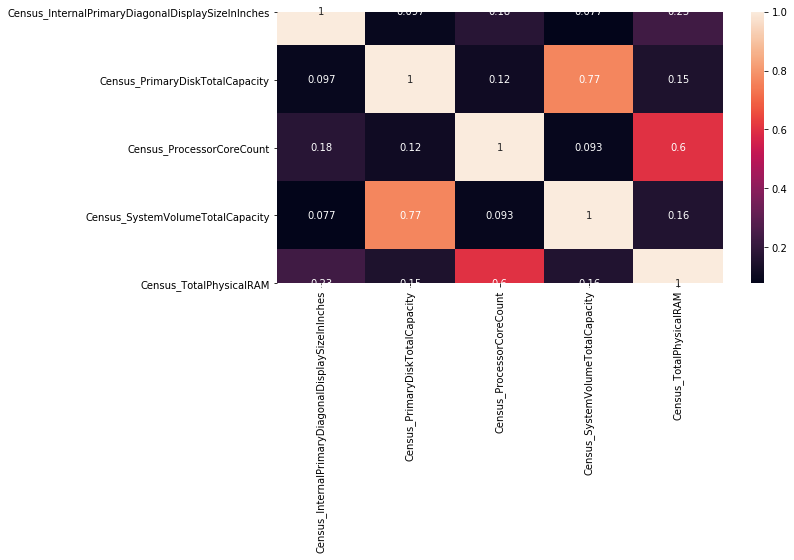

<Figure size 1080x1080 with 0 Axes>

In [47]:
sns.heatmap(df[numerical_features].corr(),annot=True)
plt.figure(figsize=(15, 15))

In [56]:
@interact
def lineplot(col=categorical_features):
    df[col].value_counts().plot.bar()
    plt.title(str(col))
    plt.figure(figsize=(20, 40))

interactive(children=(Dropdown(description='col', options=('AppVersion', 'AVProductsEnabled', 'AVProductsInsta…

In [96]:
@interact
def lineplot(col=binary_features):
    df[col].astype(str).value_counts().plot.bar()
    plt.title(str(col))
    plt.figure(figsize=(20, 40))

interactive(children=(Dropdown(description='col', options=('Census_HasOpticalDiskDrive', 'Census_IsAlwaysOnAlw…

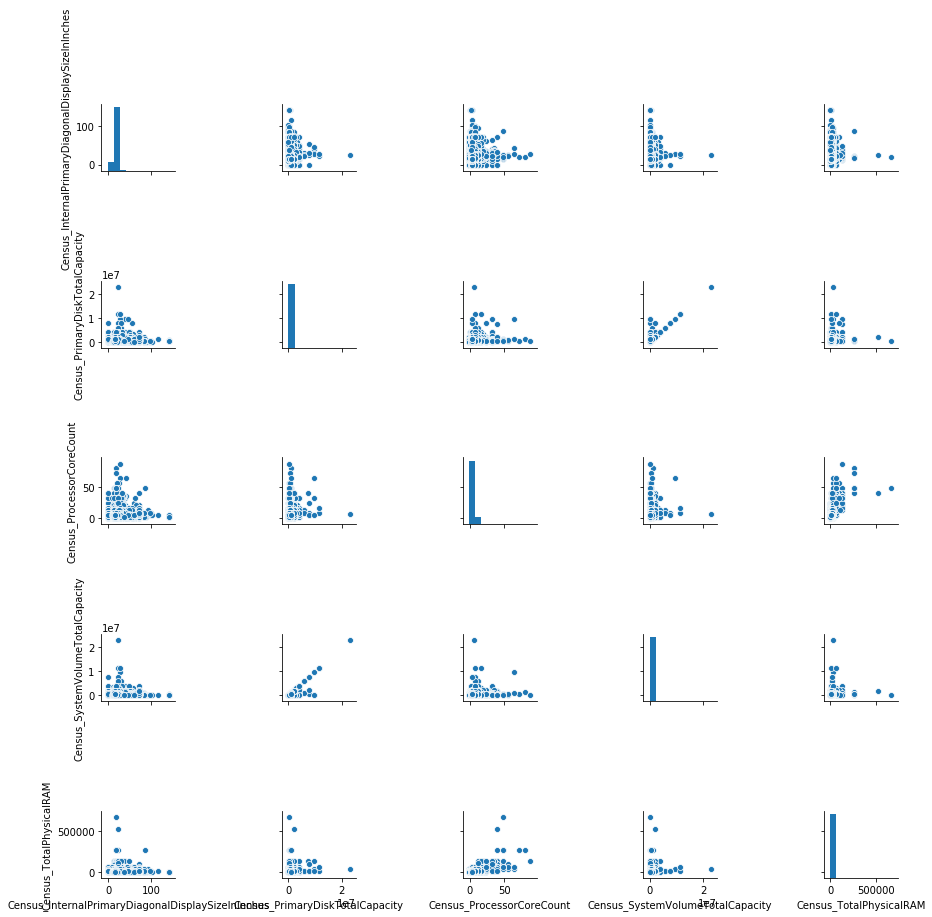

In [57]:
sns.pairplot(df[numerical_features])

In [94]:
@interact
def lineplot(col1=numerical_features,col2=numerical_features):
    sns.relplot(x=col1, y=col2, data=df)
    plt.figure(figsize=(20, 40))

interactive(children=(Dropdown(description='col1', options=('Census_InternalPrimaryDiagonalDisplaySizeInInches…

C:\Users\bharat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bharat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


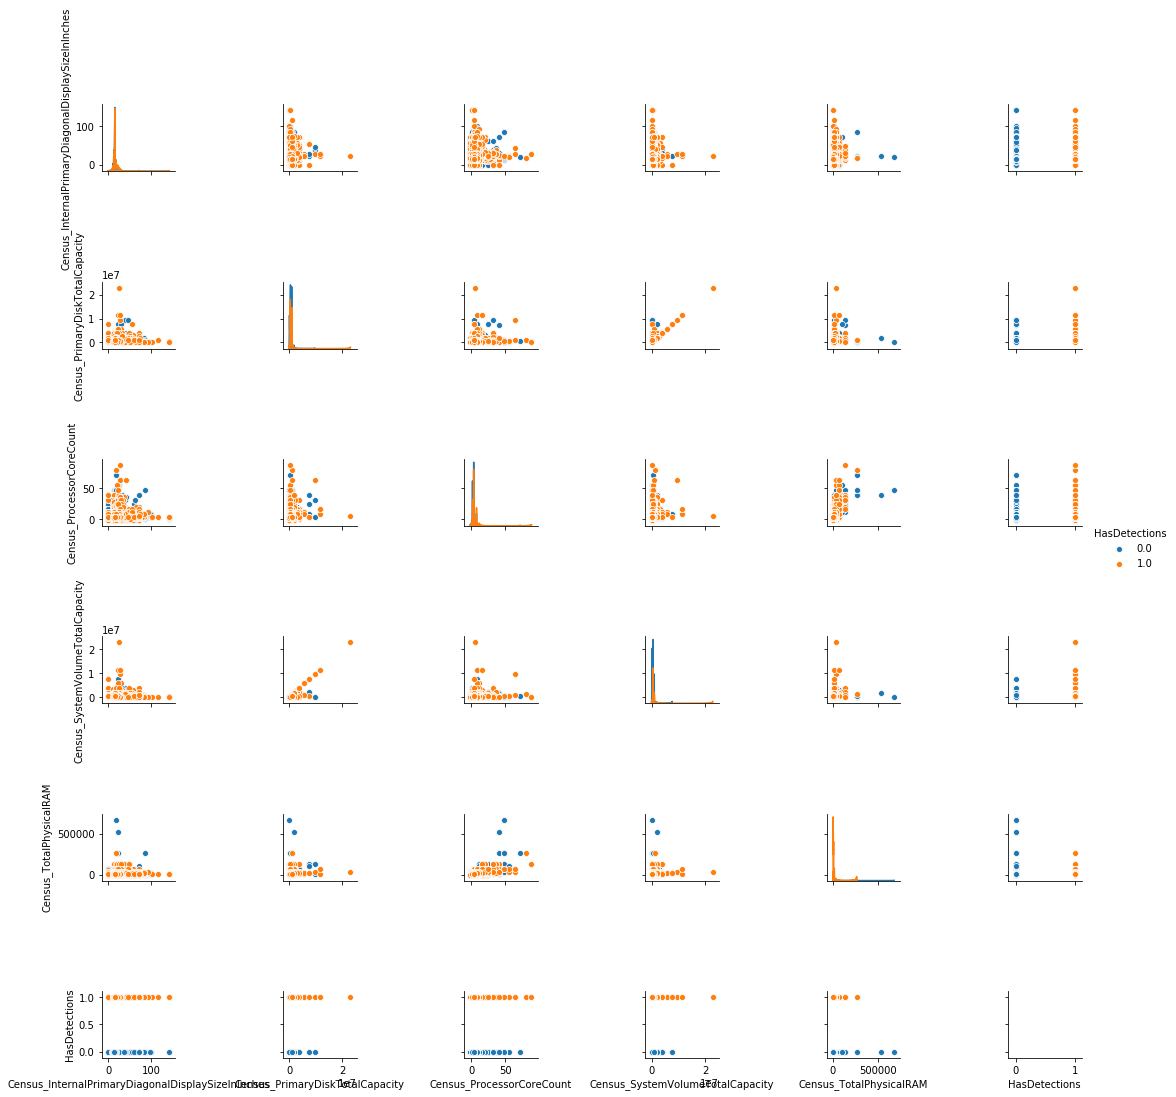

In [92]:
sns.pairplot(df[['Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_PrimaryDiskTotalCapacity',
 'Census_ProcessorCoreCount',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM','HasDetections']],hue='HasDetections')

In [95]:
@interact
def lineplot(col1=numerical_features,col2=numerical_features):
    sns.relplot(x=col1, y=col2, data=df[['Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_PrimaryDiskTotalCapacity',
 'Census_ProcessorCoreCount',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM','HasDetections']],hue='HasDetections')
    plt.figure(figsize=(20, 40))

interactive(children=(Dropdown(description='col1', options=('Census_InternalPrimaryDiagonalDisplaySizeInInches…

In [98]:
@interact
def lineplot(col=numerical_features):
    sns.catplot(x='HasDetections', y=col, data=df[['Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_PrimaryDiskTotalCapacity',
 'Census_ProcessorCoreCount',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM','HasDetections']])
    plt.figure(figsize=(20, 40))

interactive(children=(Dropdown(description='col', options=('Census_InternalPrimaryDiagonalDisplaySizeInInches'…

In [99]:
@interact
def lineplot(col=numerical_features):
    sns.catplot(x='HasDetections', y=col, data=df[['Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_PrimaryDiskTotalCapacity',
 'Census_ProcessorCoreCount',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM','HasDetections']], kind="box")
    plt.figure(figsize=(20, 40))

interactive(children=(Dropdown(description='col', options=('Census_InternalPrimaryDiagonalDisplaySizeInInches'…

In [100]:
@interact
def lineplot(col=numerical_features):
    sns.catplot(x='HasDetections', y=col, data=df[['Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_PrimaryDiskTotalCapacity',
 'Census_ProcessorCoreCount',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM','HasDetections']], kind="boxen")
    plt.figure(figsize=(20, 40))

interactive(children=(Dropdown(description='col', options=('Census_InternalPrimaryDiagonalDisplaySizeInInches'…